In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import networkx as nx
import numpy as np

In [9]:
dic     = {}

for N in [4,6,8,10,12,14,16]:

    df          = pd.read_csv(f"net_currents_Nx=5_Ny=5_Nz=1_Ne={N}.csv")
    df1         = df.copy()
    dic[N]      = df1

dic[4]

,"(0, 23)","(1, 27)","(2, 4)","(3, 28)","(4, 2)","(4, 5)","(4, 9)","(5, 4)","(5, 6)","(5, 10)",...,"(26, 21)","(26, 25)","(26, 27)","(27, 1)","(27, 22)","(27, 26)","(27, 28)","(28, 3)","(28, 23)","(28, 27)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,9.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,...,0.0,2.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0
2,6.0,5.0,0.0,0.0,11.0,0.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
3,7.0,5.0,0.0,0.0,10.0,0.0,0.0,5.0,0.0,1.0,...,1.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0


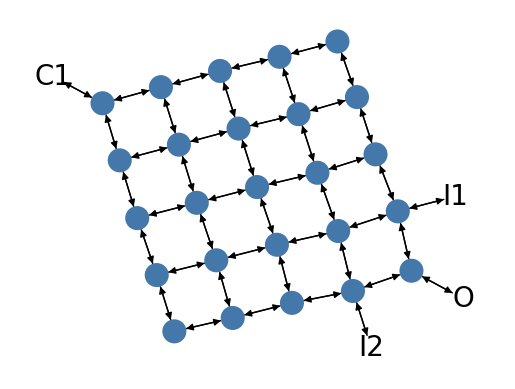

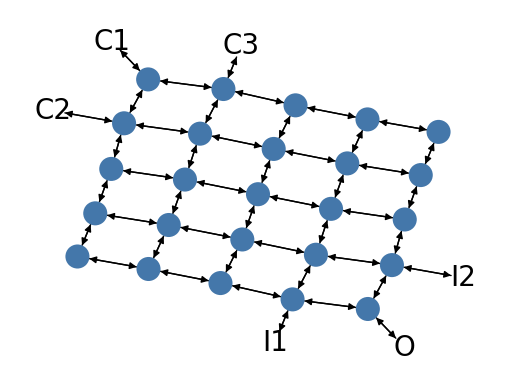

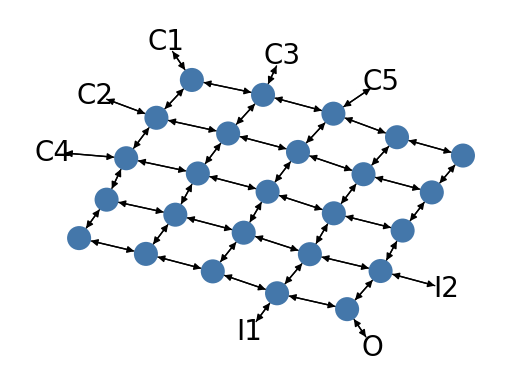

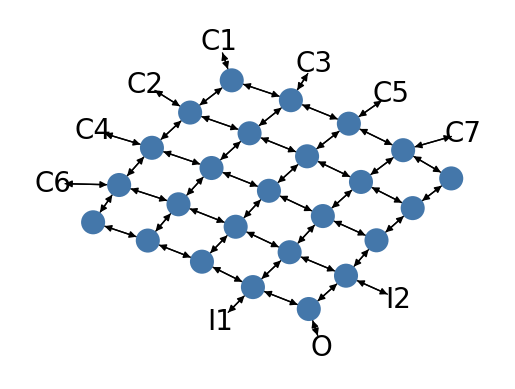

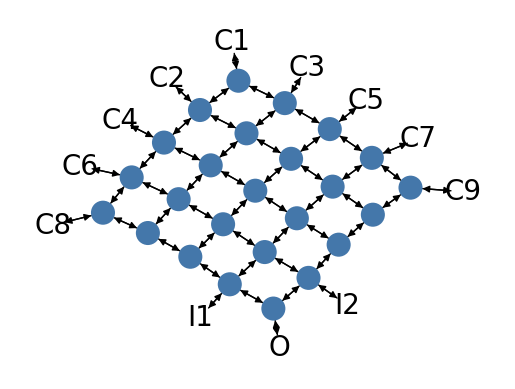

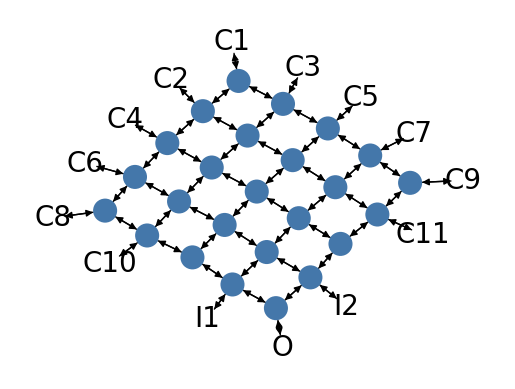

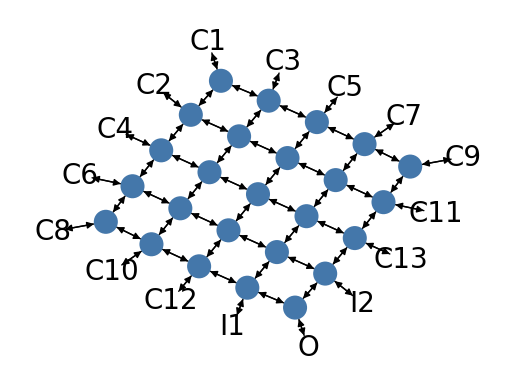

In [10]:
for N in [4,6,8,10,12,14,16]:
    edges   = list(dic[N].columns)
    edges   = [eval(i) for i in edges]
    G       = nx.DiGraph()

    for i in range(25+N):
        G.add_node(i)
    for j in edges:
        G.add_edge(j[0],j[1])

    colors              = np.repeat('#4477AA', len(list(G)))
    edgecolors          = np.repeat('none', len(list(G)))
    colors[:N]          = 'none'
    
    labels              = {i:'' for i in range(len(list(G)))}
    labels[0]           = 'I1'
    labels[1]           = 'I2'
    labels[N-1]         = 'O'
    for i in range(0,N-3):
        labels[i+2] = f'C{i+1}'

    fig = plt.figure()
    ax  = fig.add_subplot()
    pos = nx.kamada_kawai_layout(G)
    ax = nx.draw(G, pos=pos, node_color=colors, edgecolors=edgecolors,ax=ax, arrows=True)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=20,ax=ax)
    # fig = plt.figure()
    # ax  = fig.add_subplot()
    # ax  = nx.draw(G, pos=pos, ax=ax, node_color=colors, arrows=False)#, edgecolors=edgecolors)
    # nx.draw_networkx_labels(G, pos=pos, font_size=20, ax=ax)
    # fig.savefig(f"{N}.svg", transparent=True, bbox_inches='tight')
plt.show()